In [261]:
%matplotlib inline

# Assignment 2

**DUE: Sunday October 23 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [262]:
NAME = "Marian Zlateva"
STUDENT_ID = "1797310"

## Problem 1 - Yield Dataset with Polynomial Regression

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

This dataset of size $n = 15$ contains measurements of yield from an experiment done at five different temperature levels. The variables are $y = yield$ and $x = temperature$ in degrees Fahrenheit. Download the data from PyDrive.

In [264]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [265]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [266]:
downloaded = drive.CreateFile({'id':"1Oikuudc0715xr2QezMpKTNAD4_SdMfH3"})
downloaded.GetContentFile('yield.csv')  

In [267]:
# Create pandas dataframe
data = pd.read_csv('yield.csv')

In [268]:
# Let's look at the data
data

,50,3.3
0,50,2.8
1,50,2.9
2,70,2.3
3,70,2.6
4,70,2.1
5,80,2.5
6,80,2.9
7,80,2.4
8,90,3.0
9,90,3.1


In [269]:
# Look at data description
data.describe()

,50,3.3
count,14.000000,14.00000
mean,80.000000,2.80000
std,16.641006,0.38829
min,50.000000,2.10000
25%,70.000000,2.52500
50%,80.000000,2.85000
75%,90.000000,3.00000
max,100.000000,3.50000


In [270]:
# Split data in X and y using pandas functionality.
X = data.iloc[:,0] # Create vector of explanatory variables
y = data.iloc[:,1] # Create vector of target variables

# Cast dataframes into numpy arrays
X = X.values
y = y.values

# Split data into X_train, Y_train, X_test y_test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Reshape X_train, X_test for sklearn LinearRegression
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

### a) Linear Regression (10 points)

We will run a simple linear regression on this well-curated dataset using sklearn's **LinearRegression**.

Hint: Review the sklearn docs https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html and class exercise.

In [271]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_train and y_train
regressor.fit(X_train, y_train)

LinearRegression()

Let's now visually inspect the model and see how well this model predicts the yield. 
* First, plot the yield vs. temperature points from training set in black.
* Then, plot the regression line in red. Predictions from the regression model lie along the red line.

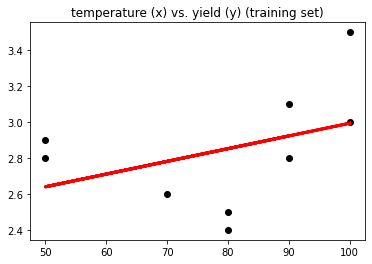

In [272]:
# Plot the actual yield (y_train) vs. temperature values from training set
plt.scatter(X_train, y_train, color='black')
plt.title('temperature (x) vs. yield (y) (training set)')

# Plot the regression line

yeild_prediction = regressor.predict(X_train)
plt.plot(X_train, yeild_prediction, color="red", linewidth=3)

plt.show()

Let's also visually inspect the prediction results from the test set.
* First, plot the yield vs. temperature points from the test set in black
* Then plot the regression line in red to see how prediction is similar to or different from the actual target.

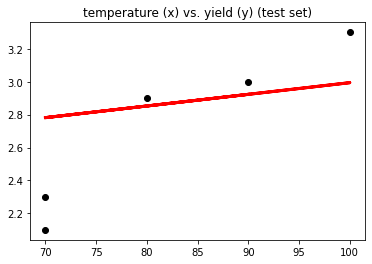

In [273]:
# Plot the actual yield (y_test) vs. temperature values  for the test set

plt.scatter(X_test, y_test, color='black')
plt.title('temperature (x) vs. yield (y) (test set)')

# Plot the regression line

yeild_prediction = regressor.predict(X_test)
plt.plot(X_test, yeild_prediction, color="red", linewidth=3)

plt.show()

### b) Inspecting Linear Regression Model (5 points)

After inspecting the results visually, does this model appear to be a good or bad fit on the test set and training set? 

*ANSWER It's a bad fit because it doesn't fit to the low yeild values well

Does the model display signs of underfitting? If so, why?

*ANSWER Yes because it doesn't represent the line of best fit well. It could be better if the slope was bigger and the y-intercept was lower

### c) Polynomial Regression (10 points)

Data may not follow a linear relationship from the independent variable $X$ to the dependent variable $y$. Fitting a linear model to this would be inaccurate and yield a high loss. 

If we want to model an order $d$ polynomial relationship between $X$ and $y$ we can augment our initial linear model where instead of having:
$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)}
$$

We have:

$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)} + \theta_2 {x^{(i)}}^2 + \cdots + \theta_d {x^{(i)}}^d
$$

We can use the same linear regression algorithm we if we first augment $X$ and add extra columns (or dimensions). 

$$ \textbf X =
\begin{bmatrix}
    x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots       & \vdots & \ddots & \vdots \\
    x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}$$

Then our new higher order $\hat Y$ is computed same as before.

$$ \hat Y =  X \theta =
\begin{bmatrix}
    1 & x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    1 & x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{d} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + \theta_1 x^{(1)} + \theta_2 {x^{(1)}}^2 + \cdots + \theta_{d}  {x^{(1)}}^d \\
    \theta_0 + \theta_1 x^{(2)} + \theta_2 {x^{(2)}}^2 + \cdots + \theta_{d}  {x^{(2)}}^d  \\
    \vdots   \\
    \theta_0 + \theta_1 x^{(n)} + \theta_2 {x^{(n)}}^2 + \cdots + \theta_{d}  {x^{(n)}}^d
\end{bmatrix} 
= \begin{bmatrix}\hat y^{(1)} \\ \hat y^{(2)} \\ \vdots \\ \hat y^{(n)} 
\end{bmatrix}$$

Using sklearn's **PolynomialFeatures** functionality, we will now transform X_train and X_test into second order polynomial space.

For more info: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [274]:
# First, lets look at the values of X_train
print(X_train)

[[100]
 [ 90]
 [ 50]
 [ 80]
 [ 90]
 [ 70]
 [ 50]
 [ 80]
 [100]]


In [275]:
from sklearn.preprocessing import PolynomialFeatures

# Creates polynomial transform of degree 2
poly = PolynomialFeatures(2)

# Transform X_train X_test
X_train_pol = poly.fit_transform(X_train)
X_test_pol = poly.fit_transform(X_test)

# Print X_train_pol
print(X_train_pol)

[[1.0e+00 1.0e+02 1.0e+04]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 1.0e+02 1.0e+04]]


We can now fit a second degree polynomial regression model to the transformed data.

In [276]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
regressor_pol = LinearRegression()

# Fit the regressor using X_train_pol and y_train

regressor_pol.fit(X_train_pol, y_train)

LinearRegression()

Now, visually inspect the polynomial regression model and see how well this model predicts the yield on the training set. 

Plot the yield vs. temperature points in black along with the polynomial regression line in red. Hint: For plotting the regression line, you can use the plot function to interpolate the regression line based on the model's prediction on data points.

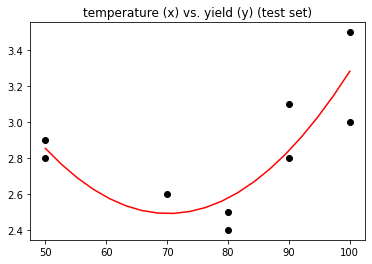

In [277]:
# Plot the actual yield (y_train) vs temp. values from training set

plt.scatter(X_train, y_train, color='black')
plt.title('temperature (x) vs. yield (y) (test set)')

# Plot the regression line (from office hours)
# https://www.w3schools.com/python/matplotlib_pyplot.asp

x = np.linspace(50,100,20) #20 pts from 50 to 100
x = x.reshape(-1,1) #transpose
x_pol = poly.transform(x)
y = regressor_pol.predict(x_pol)

yeild_prediction = regressor_pol.predict(x_pol)
plt.plot(x,y,color='red')

### YOUR CODE HERE ###

Lastly, let's plot the test set yield vs. temperature points along with the polynomial regression line.

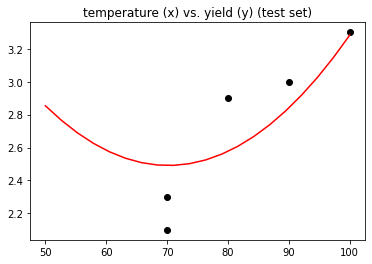

In [278]:
# Plot the actual yield (y_test) vs temp. values from test set

plt.scatter(X_test, y_test, color='black')
plt.title('temperature (x) vs. yield (y) (test set)')

# Plot the regression line
plt.plot(x,y,color='red')


### YOUR CODE HERE ###

### d) Inpsecting Polynomial Regression Model (5 points)

After inspecting the polynomial regression model, does the model appear to be a better fit than simple linear regression? 

*ANSWER Yes, it fits the smaller y's slightly better.

Does the model address display more or less underfitting than the simple linear regression model and why?

*ANSWER It displays less underfitting because the model fits the data better.

## Problem 2 - Fish Dataset

## Importing the Dataset

We will now perform different variations of linear regression to predict fish weight given species type, weight, and physical measurements. The different attributes of the data are:

- Species: species name of fish

- Weight: weight of fish in Gram (g)

- Length1: vertical length in (cm)

- Length2: diagonal length in (cm)

- Length3: cross length in (cm)

- Height: height in (cm)

- Width: diagonal width in (cm)

Begin by downloading the Fish.csv file from google drive. Make sure to select your @ucsc.edu email when authorizing access to your account. 

In [279]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [280]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [281]:
# Download the Fish data
downloaded = drive.CreateFile({'id':"13Q2WAaDIP6D5yrQlLV3OMnkmcwxcAwHz"})
downloaded.GetContentFile('Fish.csv')  

In [282]:
import pandas as pd

# Create pandas dataframe
fish_data = pd.read_csv('Fish.csv')

Let's look at some of the data and check some of the dataset descriptors.

In [283]:
# Let's print out the first few rows
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [284]:
# Let's get the data shape
fish_data.shape

(159, 7)

In [285]:
# Let's describe the data
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [286]:
# Lastly, let's get data info
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### a) Removing 0's from data (5 points)

We can see that there aren't any null values in this dataset by using the .info() function. However, .describe() shows us there are weights of 0.0g which is ambiguous and is likely a recording error. 

Drop any row that has a weight of 0.0.

In [287]:
# Delete any rows for which there is a measurement of 0.0 for weight.
indexes = fish_data[ fish_data['Weight']==0].index
fish_data.drop(indexes, inplace=True)

# Let's take another look.
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### b) Outlier Detection \& Elimination (5 points)

Using 4 standard deviations from the mean as our cut-off, and using the data listed using the describe function above, are there any outliers?

In [288]:
### YOUR CODE HERE ###

def getOutliers(colName):
  fish_data['calc'] = (fish_data[colName] - fish_data[colName].mean()) / fish_data[colName].std()
  # print(fish_data['calc'])
  indexes = 0
  indexes += len(fish_data[ fish_data['calc'] > 4].index)
  indexes += len(fish_data[ fish_data['calc'] < -4].index)

  fish_data.drop(columns=['calc'], inplace=True)

  print(colName, "outliers: ",indexes)
  

# Cleanup - delete the z-tranform column since we don't need it any more.


getOutliers('Weight')
getOutliers('Length1')
getOutliers('Length2')
getOutliers('Length3')
getOutliers('Height')
getOutliers('Width')

Weight outliers:  0
Length1 outliers:  0
Length2 outliers:  0
Length3 outliers:  0
Height outliers:  0
Width outliers:  0


There are no outliers

## Problem 3 - Fish Linear Regression

You will now run different versions of linear regression in order to predict fish Weight using the 6 explanatory variables.

### a) Multiple Linear Regression (6 points)

First, run a multiple linear regression using only the height, width, and length measurements to predict weight. We will begin by splitting the data into features **X_fish** and target variable **y_fish**.

In [289]:
y_fish = fish_data.iloc[:, 1] # Get Fish Weights
X_fish = fish_data.drop(columns=['Weight']) # Get Fish measurements plus species
X_fish = X_fish.drop(columns=['Species']) # Drop the Fish Species for now

# Print X.head(), you should have 5 features for each sample
print("X_fish.head():")
print(X_fish.head())

# Print y.head(), you should have one label for each sample
print("\ny_fish.head()")
print(y_fish.head())

X_fish.head():
   Length1  Length2  Length3   Height   Width
0     23.2     25.4     30.0  11.5200  4.0200
1     24.0     26.3     31.2  12.4800  4.3056
2     23.9     26.5     31.1  12.3778  4.6961
3     26.3     29.0     33.5  12.7300  4.4555
4     26.5     29.0     34.0  12.4440  5.1340

y_fish.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Now, we are almost ready to run regression with scikit-learn. We need to first convert **X_fish** and **y_fish** into numpy arrays and split the data into training and validation splits using sklearn **train_test_split**. 

sklearn's train_test_split offers customizable functionality when creating training and test sets. For more information, checkout https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html .

In [290]:
# Convert X, and y into np arrays
X_fish = X_fish.values
y_fish = y_fish.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 0)

Now we are ready to run a multiple linear regression. Use sklearn's **LinearRegression** to carry out the regression.

In [291]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train and y_fish_train
regressor.fit(X_fish_train, y_fish_train)


LinearRegression()

Now let's see how we did and generate predictions for X_fish_test. Then print predicted values and actual target values side-by-side for a visual comparison.

In [292]:
# Generate predictions using X_fish_test
y_fish_pred = regressor.predict(X_fish_test)

# Print the predictions along with actual weights
print("predictions",y_fish_pred)
print("actual targets",y_fish_test)


predictions [ 476.59117882  207.99295613  696.61277798  829.8356242   155.66081611
  839.43077312  756.42454219  860.9053846   648.06518937  194.36935617
  656.33115593  988.3533044   694.41908995   27.97315647   90.40492061
  279.88428528  426.51714491  253.27497124  988.3533044   380.41382554
  203.773294    873.13422668  776.42866652  514.64529123  156.2549434
   98.82407554  423.34057751  638.76055132 -203.30791322  611.87530104
  352.87773986  307.75783507]
actual targets [ 390.   160.   700.  1015.   120.  1100.   820.   950.   556.   145.
  700.  1600.   720.    55.    85.   188.   300.   180.  1550.   306.
  140.   975.  1000.   450.   110.    78.   300.   650.     6.7  514.
  290.   270. ]


### b) Computing MSE and R-squared for MLR (5 points)

The model appears to do an okay job predicting some weights while missing the mark on others. Let's quantify the results by computing mean squared error (MSE) and the coefficient of determination (R-squared). sklearn's metrics package provides functions to compute the values for you. 

More info can be found here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [293]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pred
print(f'Mean squared error: {mean_squared_error(y_fish_test, y_fish_pred):.2f}') #from class exercise

# Compute the coefficient of determination using y_fish_test and y_fish_pred
print(f'Coefficient of determination: {r2_score(y_fish_test, y_fish_pred):.2f}') #from class exercise

Mean squared error: 31561.77
Coefficient of determination: 0.82


Using the y_fish_test and y_fish_pred, what was the mean squared error for this model?

*ANSWER Mean squared error: 31561.77


Using the y_fish_test and y_fish_pred, what was the coefficient of detemination for this model?

*ANSWER Coefficient of determination: 0.82

### c) Polynomial Multiple Linear Regression (12 points)

We have seen how polynomial regression can increase the predictive power of linear regression models. We will now run a polynomial multiple linear regression model in order to gain a more accurate model. Begin by transforming the features X_fish_test and X_fish_train into second order polynomial space. There will be interaction terms in the transformed dataset as well. For more on interaction terms visit the sklearn docs.

In [294]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial transform of degree 2. hint: problem 1
poly = PolynomialFeatures(2)

# Transform X_fish_train X_fish_test to second order polynomial space
X_fish_train_pol = poly.fit_transform(X_fish_train)
X_fish_test_pol = poly.fit_transform(X_fish_test)

# Print 5 rows of X_fish_train_poly, shape should be (5,21)
print(X_fish_train_pol[:5,:])

[[1.00000000e+00 3.04000000e+01 3.30000000e+01 3.83000000e+01
  1.48604000e+01 5.28540000e+00 9.24160000e+02 1.00320000e+03
  1.16432000e+03 4.51756160e+02 1.60676160e+02 1.08900000e+03
  1.26390000e+03 4.90393200e+02 1.74418200e+02 1.46689000e+03
  5.69153320e+02 2.02430820e+02 2.20831488e+02 7.85431582e+01
  2.79354532e+01]
 [1.00000000e+00 3.48000000e+01 3.73000000e+01 3.98000000e+01
  6.28840000e+00 4.01980000e+00 1.21104000e+03 1.29804000e+03
  1.38504000e+03 2.18836320e+02 1.39889040e+02 1.39129000e+03
  1.48454000e+03 2.34557320e+02 1.49938540e+02 1.58404000e+03
  2.50278320e+02 1.59988040e+02 3.95439746e+01 2.52781103e+01
  1.61587920e+01]
 [1.00000000e+00 4.00000000e+01 4.25000000e+01 4.55000000e+01
  6.82500000e+00 4.45900000e+00 1.60000000e+03 1.70000000e+03
  1.82000000e+03 2.73000000e+02 1.78360000e+02 1.80625000e+03
  1.93375000e+03 2.90062500e+02 1.89507500e+02 2.07025000e+03
  3.10537500e+02 2.02884500e+02 4.65806250e+01 3.04326750e+01
  1.98826810e+01]
 [1.00000000e+00

Next run the second order polynomial regression using the transformed data. Instantiate a new regression model and use X_fish_train_pol and y_fish_train to fit the model.

In [295]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train_pol and y_fish_train
regressor.fit(X_fish_train_pol,y_fish_train)


LinearRegression()

Now let's see how we did with the second model and generate predictions using X_fish_test_pol. Then print predicted values and actual target values side-by-side for a visual comparison.

In [296]:
# generate predictions using X_test
y_fish_pol_pred = regressor.predict(X_fish_test_pol)

# Print the predictions along with actual weights
print("predictions ", y_fish_pol_pred)
print("actual targets ",y_fish_test)

predictions  [ 410.78161734  144.99000843  661.08994618  916.20938635  120.28326146
  892.29452538  779.33036275  970.51372058  613.97188853  138.75685095
  702.96694468 1200.88080985  736.01964613   68.24127116   65.41870351
  204.06717258  348.32997005  164.86007088 1200.88080985  301.29364676
  132.03878287 1080.95184924  800.55488719  465.06392928  113.12282845
   78.16667224  337.9263526   610.88838108   14.31425669  526.27843992
  265.75936168  235.08321339]
actual targets  [ 390.   160.   700.  1015.   120.  1100.   820.   950.   556.   145.
  700.  1600.   720.    55.    85.   188.   300.   180.  1550.   306.
  140.   975.  1000.   450.   110.    78.   300.   650.     6.7  514.
  290.   270. ]


### d) Computing MSE and R-squared for Polynomial Regression (5 points)

Now, compute the MSE and R-squared using y_fish_test and y_fish_pol_pred

In [297]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pol_pred
print(f'Mean squared error: {mean_squared_error(y_fish_test, y_fish_pol_pred):.2f}')

# Compute the coefficient of determination using y_fish_test and y_fish_pol_pred
print(f'Coefficient of determination: {r2_score(y_fish_test, y_fish_pol_pred):.2f}')


Mean squared error: 12552.65
Coefficient of determination: 0.93


Using the y_fish_test and y_fish_pol_pred, what was the mean squared error for this model?

*ANSWER Mean squared error: 12552.65

Using the y_fish_test and y_fish_pol_pred, what was the coefficient of detemination for this model?

*ANSWER Coefficient of determination: 0.93

### e) Multiple Linear Regression With Categorical Variable (12 points)

Now that we have done multiple linear regression, and polynomial multiple linear regression, we will now do a multiple linear regression that takes into account the species of fish by creating numeric levels.

In [298]:
# Create a copy of fish_data
fish_data_species = fish_data

# Begin by generating a dictionary that maps all unique species in fish_data to a unique id
level_dict = {species_name:i for i,species_name in enumerate(fish_data['Species'].unique())} 

# Uses the level dictionary to retrieve the id
def integer_encode_level(level):
    return level_dict[level]

# Apply the function to the Species column and store in Species column (you should overwrite the species current data with the numeric representations)
fish_data_species['Species'] = fish_data_species['Species'].apply(integer_encode_level)

# Use the numeric Species column you just created to one-hot-encode this feature, using the Pandas get_dummies function. Then delete the numeric Species column.
fish_data_species = pd.concat([fish_data_species,pd.get_dummies(fish_data_species['Species'], prefix='Species')],axis=1)
fish_data_species = fish_data_species.drop(columns=["Species"])

# Check data
fish_data_species

,Weight,Length1,Length2,Length3,Height,Width,Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,0,1
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,0,1
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,0,1
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,0,1


We will now create a dataset with 1 target column and 12 feature columns: 

Length1, Length2, Length3, Height, Width, Spec_0, Spec_1, Spec_2, Spec_3, Spec_4, Spec_5, Spec_6.

In [299]:
# Split fish_data into 
y_fish_categorical = fish_data_species.iloc[:, 0] # Get Fish Weights
X_fish_categorical = fish_data_species.drop(columns=['Weight']) # Get Fish measurements plus species

X_fish_categorical_cpy = X_fish_categorical

# Print X_fish_categorical.head(), you should have 6 features for each sample
print("X_fish_categorical.head():")
print(X_fish_categorical.head())

# Print y_fish_categorical.head(), you should have one label for each sample
print("\ny_fish_categorical.head()")
print(y_fish_categorical.head())

X_fish_categorical.head():
   Length1  Length2  Length3   Height   Width  Species_0  Species_1  \
0     23.2     25.4     30.0  11.5200  4.0200          1          0   
1     24.0     26.3     31.2  12.4800  4.3056          1          0   
2     23.9     26.5     31.1  12.3778  4.6961          1          0   
3     26.3     29.0     33.5  12.7300  4.4555          1          0   
4     26.5     29.0     34.0  12.4440  5.1340          1          0   

   Species_2  Species_3  Species_4  Species_5  Species_6  
0          0          0          0          0          0  
1          0          0          0          0          0  
2          0          0          0          0          0  
3          0          0          0          0          0  
4          0          0          0          0          0  

y_fish_categorical.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Create training and test sets for the fish data with categorical species variable:

In [300]:
# Convert X, and y into np arrays
X_fish_categorical = X_fish_categorical.values
y_fish_categorical = y_fish_categorical.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train_categorical, X_fish_test_categorical, y_fish_train_categorical, y_fish_test_categorical = train_test_split(X_fish_categorical, y_fish_categorical, test_size = 0.2, random_state = 0)

Now we are ready to run a our final multiple linear regression. As a recap, we added a categorical variable to represent the species of fish. We encoded the species as levels, and overwrote the species column with the numeric representations of the species. Now, use sklearn's **LinearRegression** to carry out regression one last time.

In [301]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train_categorical and y_fish_train_categorical
regressor.fit(X_fish_train_categorical, y_fish_train_categorical)


LinearRegression()

Let's check the predictions for this model and generate predictions using X_fish_test_categorical. Then print target and estimated weight values side-by-side.

In [302]:
# generate predictions using X_fish_test_categorical
y_fish_pred_categorical = regressor.predict(X_fish_test_categorical)


# Print the predictions along with actual weights
print("predictions ", y_fish_pred_categorical)
print("actual targets ",y_fish_test_categorical)

predictions  [ 446.17903555  201.3215343   719.01091459  895.7044696    76.68973367
  913.32596816  825.02970894  880.97643445  661.23970033  183.84246337
  704.98914626 1092.28989248  728.53350935  -89.63394122   51.90975236
  262.30549462  369.73698835  237.22909697 1092.28989248  380.3923923
  128.73284194  937.73584132  792.01319329  481.4630642   103.25655096
    7.26381238  393.21935141  607.0017268   -69.15767511  578.52069687
  342.05134067  312.61766961]
actual targets  [ 390.   160.   700.  1015.   120.  1100.   820.   950.   556.   145.
  700.  1600.   720.    55.    85.   188.   300.   180.  1550.   306.
  140.   975.  1000.   450.   110.    78.   300.   650.     6.7  514.
  290.   270. ]


### f) Computing MSE and R-squared for MLR with Categorical Variable (5 points)

In [303]:
# Compute the mean squared error using y_fish_test_categorical and y_fish_pred_categorical
print(f'Mean squared error: {mean_squared_error(y_fish_test_categorical, y_fish_pred_categorical):.2f}') 

# Compute the coefficient of determination using y_fish_test_categorical and y_fish_pred_categorical
print(f'Coefficient of determination: {r2_score(y_fish_test_categorical, y_fish_pred_categorical):.2f}')


Mean squared error: 20560.05
Coefficient of determination: 0.89


Using y_fish_test_categorical and y_fish_pred_categorical, what was the mean squared error for this model?

Mean squared error: 20560.05

Using y_fish_test_categorical and y_fish_pred_categorical, what was the coefficient of detemination for this model?

Coefficient of determination: 0.89

### g) Researching for the Best Model (15 points)

Read [this](https://www.datarobot.com/blog/regularized-linear-regression-with-scikit-learn/) tutorial to see how you can control the degree of the polynomial and train a **Regularized** linear regression model.

In the cell below, investigate and show your observations on:
1. Which features are important?
2. What polynomial order is appropriate for the model to have an appropriate fit (no overfitting or underfitting)?
3. The impact of regularization (L2 norm or L1 norm) and the regularizer factor/parameter on model's generalization capability.
4. Finally, report your best model (including model's cost function, regularizer, regularizer factor, and polynomial order) along with a plot of model's performance on the training data and test data. We expect this model to perform better than all prior models you trained.

#1
coefficients [ -64.03058524   61.89600593   20.13264246   19.03065441   51.14917962
 -130.4457005   -18.66105244  -41.44744396  -17.93008157   16.72330098
 -122.53983013  314.30080762]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 158
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Length1    158 non-null    float64
 1   Length2    158 non-null    float64
 2   Length3    158 non-null    float64
 3   Height     158 non-null    float64
 4   Width      158 non-null    float64
 5   Species_0  158 non-null    uint8  
 6   Species_1  158 non-null    uint8  
 7   Species_2  158 non-null    uint8  
 8   Species_3  158 non-null    uint8  
 9   Species_4  158 non-null    uint8  
 10  Species_5  158 non-null    uint8  
 11  Species_6  158 non-null    uint8  
dtypes: float64(5), uint8(7)
memory usage: 8.5 KB
self: None
*ANSWER length3, height, species1, species3, and species4 aren't very important bc its

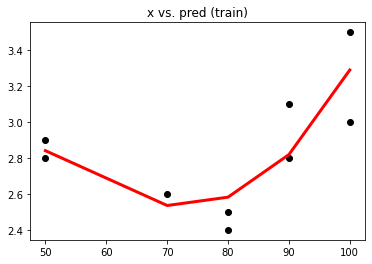

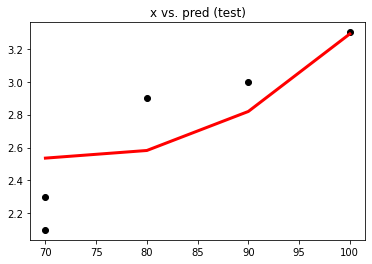

In [305]:
### YOUR CODE HERE ###
try:
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.pipeline import make_pipeline
except ImportError:
  # use backports for sklearn 1.4
  # available from https://s3.amazonaws.com/datarobotblog/notebooks/sklearn_backports.py
  from sklearn_backports import PolynomialFeatures
  from sklearn_backports import make_pipeline
from sklearn.linear_model import Lasso
#1)

print("#1")
print("coefficients",regressor.coef_)
print("self:",X_fish_categorical_cpy.info())
print("*ANSWER length3, height, species1, species3, and species4 aren't very important bc its weights are somewhat small")
print("\n\n")

#2)
#run this in a forloop with different degrees <10
from sklearn.metrics import mean_squared_error

min_pol = 1000000000
min_pol_err = 10000000
for x in range(1,10):
  est = make_pipeline(PolynomialFeatures(x), LinearRegression())
  est.fit(X_train, y_train)
  pred = est.predict(X_test)
  err = mean_squared_error(pred, y_test)

  if err < min_pol_err:
    min_pol_err = err
    min_pol = x

print("#2")
print("*ANSWER best polynomail order = ",min_pol)
print("\n\n")


pol_est = make_pipeline(PolynomialFeatures(min_pol), LinearRegression())
pol_est.fit(X_train, y_train)
# # print(est.coef_)
# print(pol_est)
# # print(est['polynomialfeatures'].coef_)
# print(pol_est['linearregression'].coef_)


#3
# run a forloop using best degree in 2 and run it with alpha
#est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))

min_alpha = 1000000000
min_alpha_err = 10000000

for x in range(1,100):
  est = make_pipeline(PolynomialFeatures(min_pol), Lasso(alpha=x))
  est.fit(X_train, y_train)
  pred = est.predict(X_test)
  err = mean_squared_error(pred, y_test)

  if err < min_alpha_err:
    min_alpha = x
    min_alpha_err = err

alpha_est = make_pipeline(PolynomialFeatures(min_pol), Lasso(alpha=min_alpha))
alpha_est.fit(X_train, y_train)

print("#3")
print("best regulizer value: ", min_alpha)
print("this regulizer improves the mean_squared_error by",min_alpha_err-min_pol_err)
print("before regularization weights: ",pol_est['linearregression'].coef_)
print("after regularization weights: ", alpha_est['lasso'].coef_)
print("diff",alpha_est['lasso'].coef_-pol_est['linearregression'].coef_)
print("\n\n")


#custom plot functions:
import operator
def sortPredictionByAxis(x_axis, prediction): #src: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(x_axis,prediction), key=sort_axis)
  x_axis, sorted_pred = zip(*sorted_zip)
  return x_axis, sorted_pred

def myPlot(x_data, colNum, colName, scatter_real_y, prediction_y, y_name):
  x_axis = x_data[:,colNum]

  plt.title(colName + " vs. " + y_name)
  plt.scatter(x_axis, scatter_real_y, color='black')

  x,y = sortPredictionByAxis(x_axis, prediction_y)
  plt.plot(x, y, color="red", linewidth=3)
  plt.show()





#4
# plot error
print("#4")
print("best model:")
print("cost function: least squares")
print("regulizer: L1")
print("regulizer factor: ",min_alpha)
print("polynomial order: ",min_pol)
print("\n\n")

est = make_pipeline(PolynomialFeatures(min_pol), Lasso(alpha=min_alpha))
est.fit(X_train, y_train)

pred = est.predict(X_train)

myPlot(X_train,0, "x", y_train,pred, "pred (train)")



pred = est.predict(X_test)


myPlot(X_test,0, "x", y_test,pred, "pred (test)")

*ANSWER answer printed with data above